# Contents
### 01. Import Libraries and Data
### 02. Exploring Relationships
    Correlation heatmap
    Scatterplot
    Pair plot
    Categorical plot
### 03. Results
    Questions
    Hypotheses
### 04. Export Visualizations

# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Checking version of matplotlib
matplotlib.__version__

'3.5.1'

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Assign path to str
path = r'/Users/allyfornino/Documents/11-2022 Gun Violence Analysis/'

In [6]:
# Create vars_list of columns to import
vars_list = ['latitude', 'longitude', 'n_injured', 'n_killed', 'n_guns_involved', 'n_participants']

In [7]:
# Import clean data as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_gun_violence_data.csv'), usecols = vars_list)

In [8]:
# Check output
df.head()

,latitude,longitude,n_injured,n_killed,n_guns_involved,n_participants
0,32.2649,-90.2141,2,2,1.0,4
1,29.8736,-90.0568,5,0,3.0,9
2,35.6141,-88.8150,2,2,2.0,6
3,40.6730,-73.7881,0,1,1.0,2
4,37.0177,-78.1562,4,0,1.0,5


In [9]:
df.shape

(4721, 6)

# 02. Exploring Relationships

## Correlation Heatmap

In [10]:
# Corrrelation matrix
df.corr()

,latitude,longitude,n_injured,n_killed,n_guns_involved,n_participants
latitude,1.000000,-0.138622,-0.047868,-0.039119,0.003189,-0.036886
longitude,-0.138622,1.000000,0.044958,-0.030281,0.003079,0.004135
n_injured,-0.047868,0.044958,1.000000,0.111350,0.021483,0.674371
n_killed,-0.039119,-0.030281,0.111350,1.000000,0.015413,0.510737
n_guns_involved,0.003189,0.003079,0.021483,0.015413,1.000000,0.095112
n_participants,-0.036886,0.004135,0.674371,0.510737,0.095112,1.000000


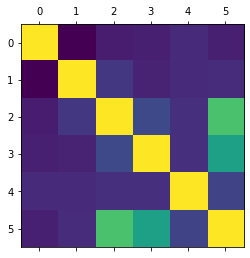

In [11]:
# Correlation heatmap
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

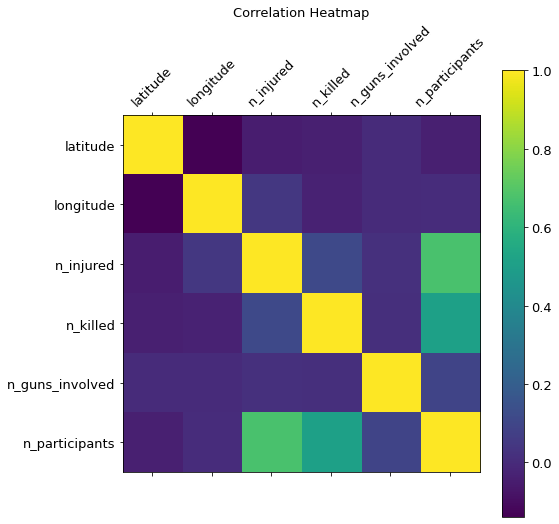

In [12]:
# Make figure larger
f = plt.figure(figsize = (8, 8))
# Add labels and a legend
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 13, rotation = 45)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 13)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 13)
plt.title('Correlation Heatmap', fontsize = 13)

#### Most variables have no relationship between them. There is a very weak relationship between n_injured and n_killed with a correlation coefficient of 0.11. There is a moderate relationship between n_participants and n_killed (0.51) as well as a strong relationship between n_participants and n_injured (0.67). This makes sense as it is expected that the more participants there are, the more injuries and deaths will occur.

## Scatterplot

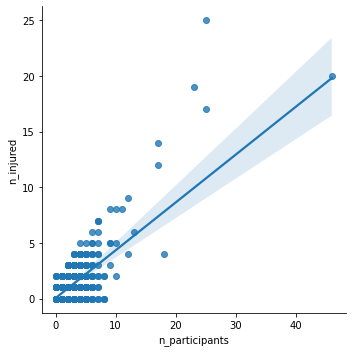

In [13]:
# Scatterplot for n_participants and n_injured columns
np_ni_scat = sns.lmplot(x = 'n_participants', y = 'n_injured', data = df)

#### The scatterplot reveals that the relationship somewhat linear, but for many incidents with more than 15 participants, the n_injured value is much higher than the trend line.

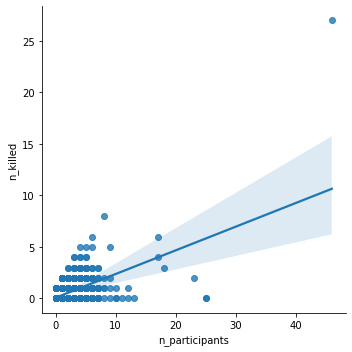

In [14]:
# Scatterplot for n_participants and n_killed columns
np_nk_scat = sns.lmplot(x = 'n_participants', y = 'n_killed', data = df)

#### The relationship between the two variables are somewhat linear, but many values lie very far from the trend line, particularly as the number of participants increases.

## Pair Plots

In [15]:
pp = df[['n_injured', 'n_killed', 'n_guns_involved', 'n_participants']]

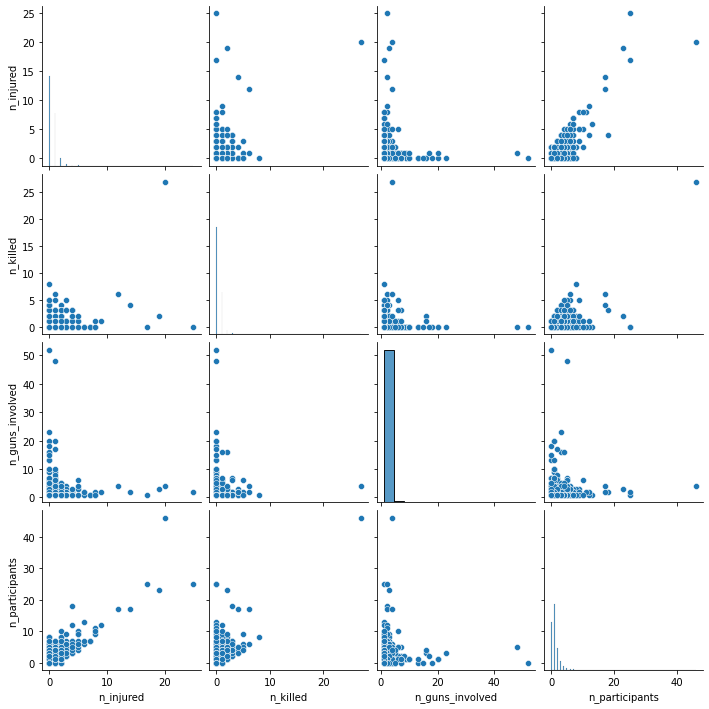

In [16]:
pairplot = sns.pairplot(pp)

#### The pair plot shows that most of the variables do not seem to have a relationship with each other. The only evident relationship is between n_participants and n_injured, as seen in the scatterplot earlier.

## Categorical Plots

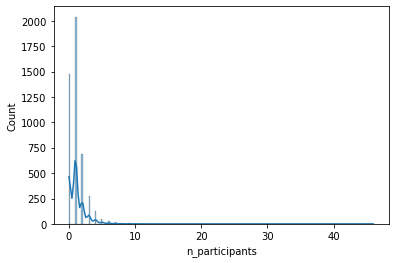

In [17]:
# Cat plot of n_killed to see if it would be helpful to divide the incidents into categories
cat_plot = sns.histplot(df['n_participants'], bins = 200, kde = True)

#### Because so many of the incidents have between 0 and 10 participants, it would not be very helpful to create categories for this variable

# 03. Results

## Questions

#### Is it possible to predict how many injuries/deaths there will be in an incident based on the number of participants?

## Hypothesis

#### For incidents in which a gun was possessed by a felon/prohibited person, a higher number of participants leads to more people injured.

# 04. Exporting Visualizations

In [18]:
f.figure.savefig(os.path.join(path, '04 Analysis', 'corr_heatmap.png'))

In [19]:
np_ni_scat.figure.savefig(os.path.join(path, '04 Analysis', 'participants_injuries_scat.png'))

In [20]:
np_nk_scat.figure.savefig(os.path.join(path, '04 Analysis', 'participants_deaths_scat.png'))

In [21]:
pairplot.savefig(os.path.join(path, '04 Analysis', 'pair_plot.png'))

In [22]:
fig = cat_plot.get_figure()
fig.savefig(os.path.join(path, '04 Analysis', 'cat_plot.png'))